In [4]:
'''
    BIRCH clustering is a hierarchial clustering algorithm
    designed for large-scale datasets
'''

'\n    BIRCH clustering is a hierarchial clustering algorithm\n    designed for large-scale datasets\n'

In [1]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
import seaborn as sns



In [5]:
# prepare data for clustering
df = pd.read_csv("/Users/alecasillas/Desktop/VLL/pbd_outliers_removed.csv")
#cols = [
#    "video_pause_4",
#    "video_play_4",
#    "video_watch_4",
#    "video_completed_4"
#]

cols = [
    "tys_finish_1",
    "tys_answer_1",
    "tys_finish_2",
    "tys_finish_3",
    "tys_review_incorrect_question_2",
    "tys_answer_2",
    "tys_answer_3",
    "tys_review_correct_question_3",
    "tys_review_incorrect_question_3",
    "tys_previous_2",
    "tys_finish_4",
    "tys_previous_3",
    "tys_answer_4",
    "tys_review_incorrect_question_1",
    "tys_load_4",
    "tys_load_2",
    "tys_previous_1",
    "tys_load_1",
    "tys_load_3",
    "tys_previous_4",
    "tys_review_incorrect_question_4",
    "tys_review_solution_video_4",
    "tys_review_correct_question_1",
    "tys_review_correct_question_2",
    "tys_review_topic_video_1",
    "tys_review_solution_video_1",
    "tys_review_correct_question_4",
    "tys_review_solution_video_2",
    "tys_review_topic_video_2",
    "tys_review_solution_video_3",
    "tys_review_topic_video_4",
    "tys_review_topic_video_3",
]

#cols = [
# "video_pause_1",
# "video_completed_1",
# "video_pause_4",
# "video_play_1",
# "video_watch_2",
# "video_watch_3",
# "video_seek_3",
# "video_play_2",
# "video_seek_4",
# "video_watch_1",
# "video_completed_2",
# "video_pause_2",
# "video_play_4",
# "video_play_3",
# "video_pause_3",
# "video_seek_1",
# "video_watch_4",
# "video_seek_2",
# "video_caption_1",
# "video_completed_3",
# "video_caption_2",
# "video_completed_4"
#]

#cols = [
 #  "wall_page_load_4",
 #  "wall_page_load_1",
 #  "wall_page_load_2",
 #  "wall_page_load_3",
 #  "wall_load_more_2",
 #  "wall_load_more_1",
 #  "wall_load_more_4",
 #  "wall_load_more_3",
 #  "wall_make_post_1",
 #  "wall_make_post_2",
 #  "wall_make_post_4"
#]


trimmed_df = df[cols]
#scores = df["ALG1_EOC_SCALE_SCORE_22"]

trimmed_df


,tys_finish_1,tys_answer_1,tys_finish_2,tys_finish_3,tys_review_incorrect_question_2,tys_answer_2,tys_answer_3,tys_review_correct_question_3,tys_review_incorrect_question_3,tys_previous_2,...,tys_review_correct_question_1,tys_review_correct_question_2,tys_review_topic_video_1,tys_review_solution_video_1,tys_review_correct_question_4,tys_review_solution_video_2,tys_review_topic_video_2,tys_review_solution_video_3,tys_review_topic_video_4,tys_review_topic_video_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,15.0,11.0,22.0,1.0,14.0,26.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,0.0,0.0,0.0,2.0,0.0,0.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
17908,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17909,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# scales data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(trimmed_df), columns=trimmed_df.columns)

df_scaled


,tys_finish_1,tys_answer_1,tys_finish_2,tys_finish_3,tys_review_incorrect_question_2,tys_answer_2,tys_answer_3,tys_review_correct_question_3,tys_review_incorrect_question_3,tys_previous_2,...,tys_review_correct_question_1,tys_review_correct_question_2,tys_review_topic_video_1,tys_review_solution_video_1,tys_review_correct_question_4,tys_review_solution_video_2,tys_review_topic_video_2,tys_review_solution_video_3,tys_review_topic_video_4,tys_review_topic_video_3
0,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.560429,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
1,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.560429,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
2,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.560429,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
3,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.560429,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
4,0.855374,0.122141,0.721985,3.256602,-0.320639,0.073288,1.047391,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,-0.508288,-0.564330,-0.539916,-0.160359,-0.461084,-0.600486,0.552677,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,1.788164,4.095216,5.525012
17908,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.498590,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
17909,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.498590,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995
17910,-0.508288,-0.564330,-0.539916,-0.502055,-0.461084,-0.600486,-0.560429,-0.213962,-0.435135,-0.437009,...,-0.220849,-0.237653,-0.209384,-0.246447,-0.278511,-0.230136,-0.20123,-0.216334,-0.244187,-0.180995


In [7]:
# remove NaN
# this imputer completes missing values with the mean
imputer = SimpleImputer(strategy="mean")
df_scaled = imputer.fit_transform(df_scaled)

In [8]:
# dimensionality scaling
'''
    Visualizes high-dimensional data by giving each data point a location
    in a two or three-dimensional map. 
'''
# synthetic data for testing
#df_scaled, _ = make_blobs(n_samples=1000, centers=100, random_state=0)

tsne = TSNE(n_components=2, random_state = 0)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), columns=["TSNE1", "TSNE2"])

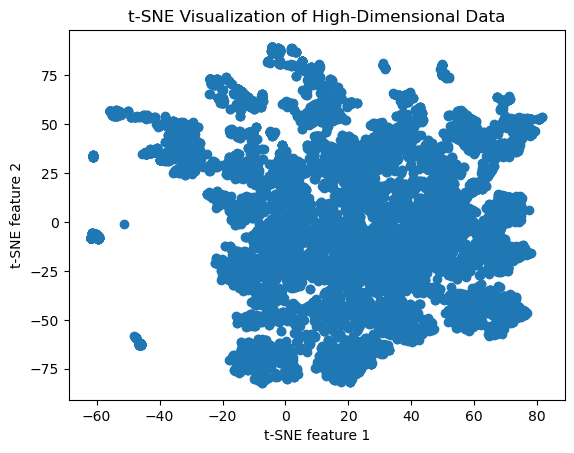

In [9]:
# This plots our TSNE reduced data (for paper)
X_2d = tsne.fit_transform(df_scaled)

# Plot
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Visualization of High-Dimensional Data')
plt.show()

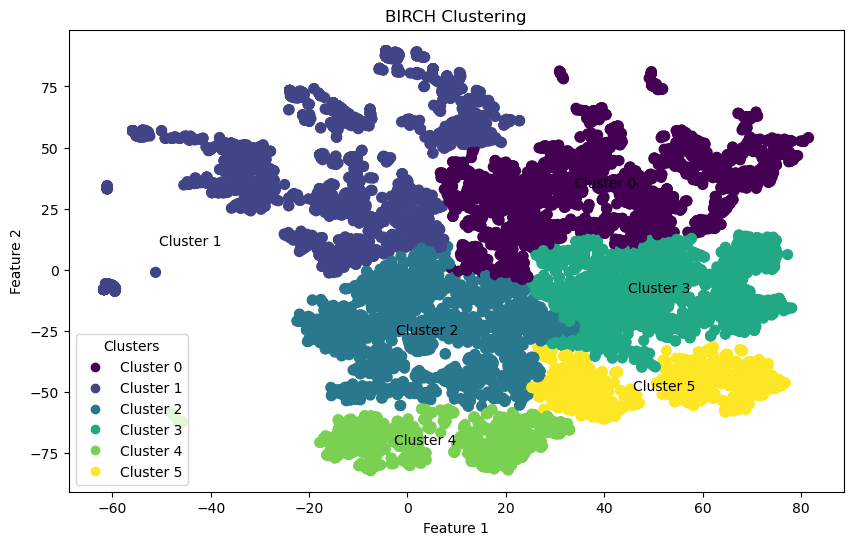

In [10]:
brc = Birch(n_clusters=6)
brc.fit(df_tsne)
labels = brc.predict(df_tsne)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels, cmap='viridis', marker='o', s=50)

# Annotate clusters with labels
for cluster_label in np.unique(labels):
    cluster_mean = np.mean(df_tsne.loc[labels == cluster_label, ['TSNE1', 'TSNE2']], axis=0)
    plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')

# Plot details
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend
legend_labels = [f'Cluster {cluster_label}' for cluster_label in np.unique(labels)]
plt.legend(handles=scatter.legend_elements()[0], title="Clusters", labels=legend_labels)

plt.show()

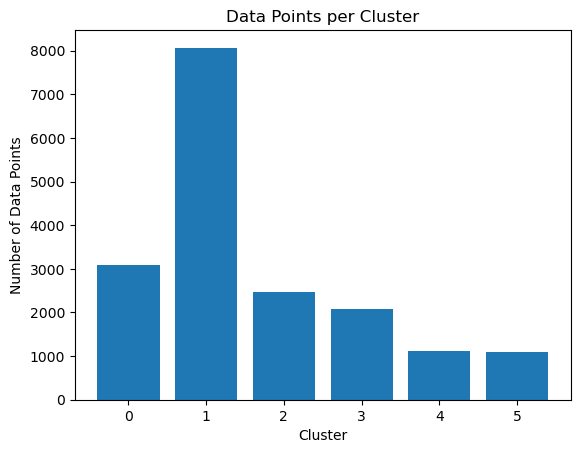

In [11]:
df_tsne['cluster'] = labels
cluster_counts = df_tsne['cluster'].value_counts().sort_index()

# Plotting
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Cluster')
plt.show()

In [12]:

# Add cluster labels to the original dataframe
df['cluster'] = labels


In [13]:

# Calculate the mean of each action within each cluster
action_means_by_cluster = df.groupby('cluster')[cols].mean()

# Identify the action with the highest mean in each cluster
highest_actions_by_cluster = action_means_by_cluster.idxmax(axis=1)

# Display the result
print("Action with the highest mean in each cluster:")
print(highest_actions_by_cluster)


Action with the highest mean in each cluster:
cluster
0    tys_answer_2
1    tys_answer_4
2    tys_answer_4
3    tys_answer_4
4    tys_answer_4
5    tys_answer_4
dtype: object


In [14]:

# Assuming 'labels' contains the cluster assignments

# Add cluster labels to the original dataframe
df['cluster'] = labels


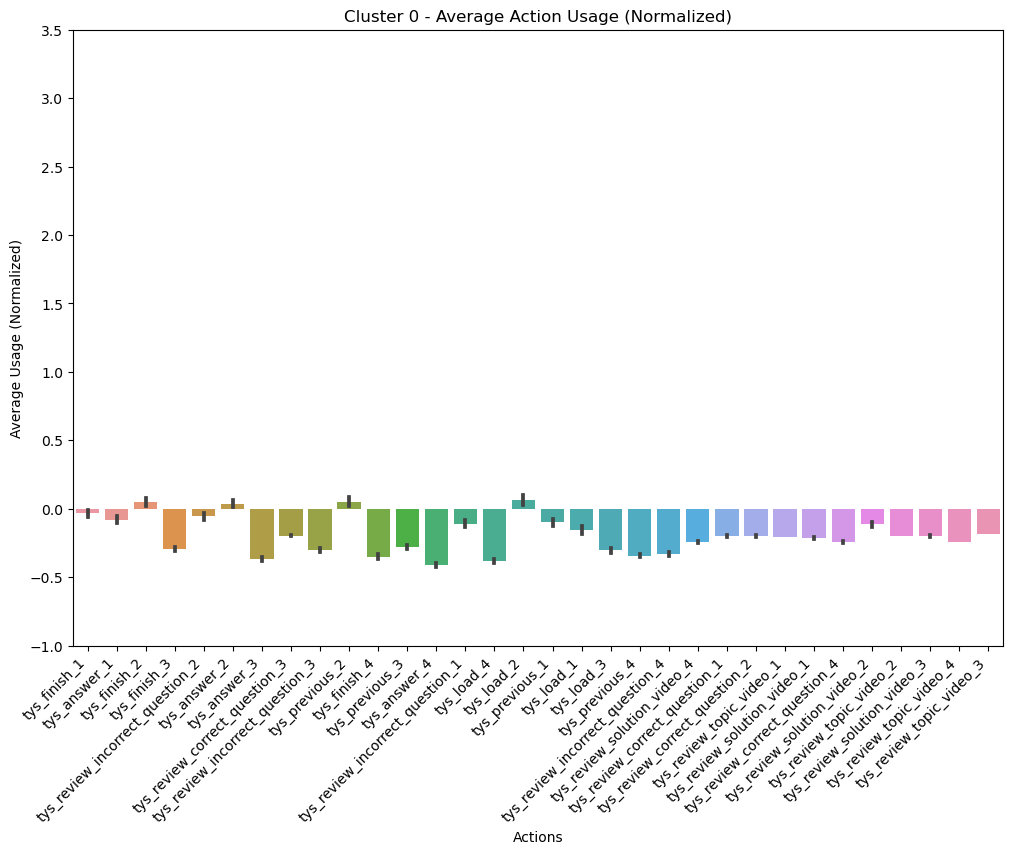

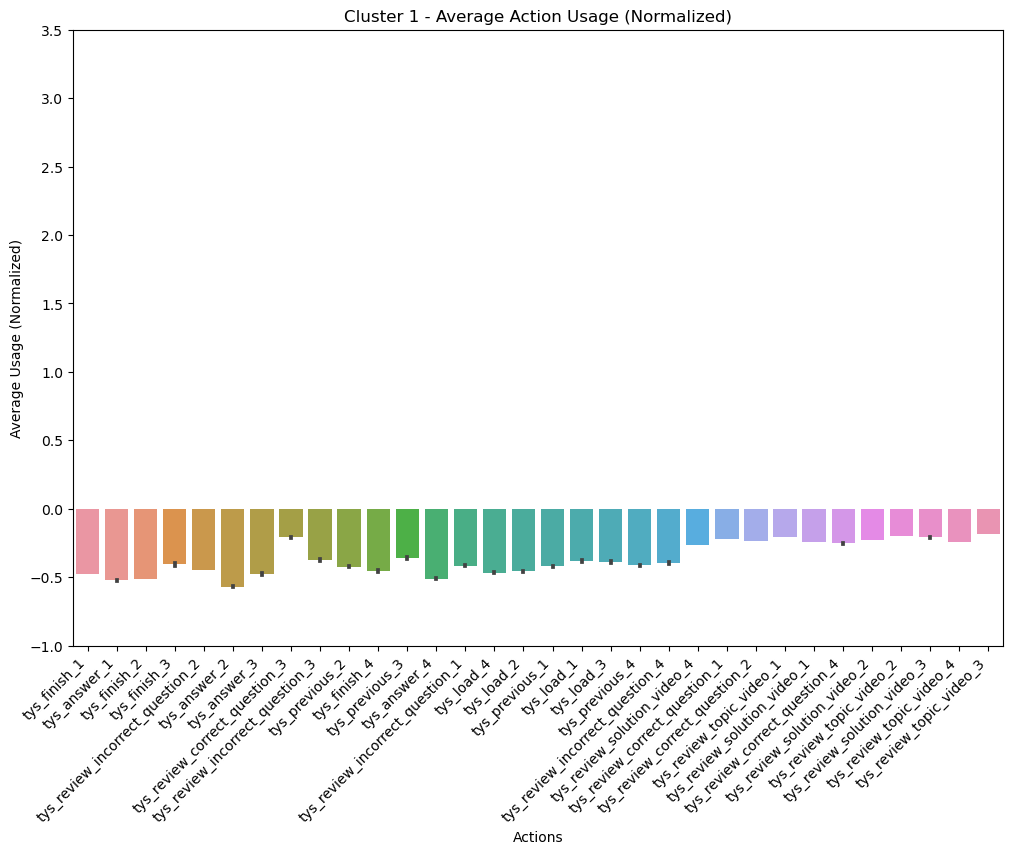

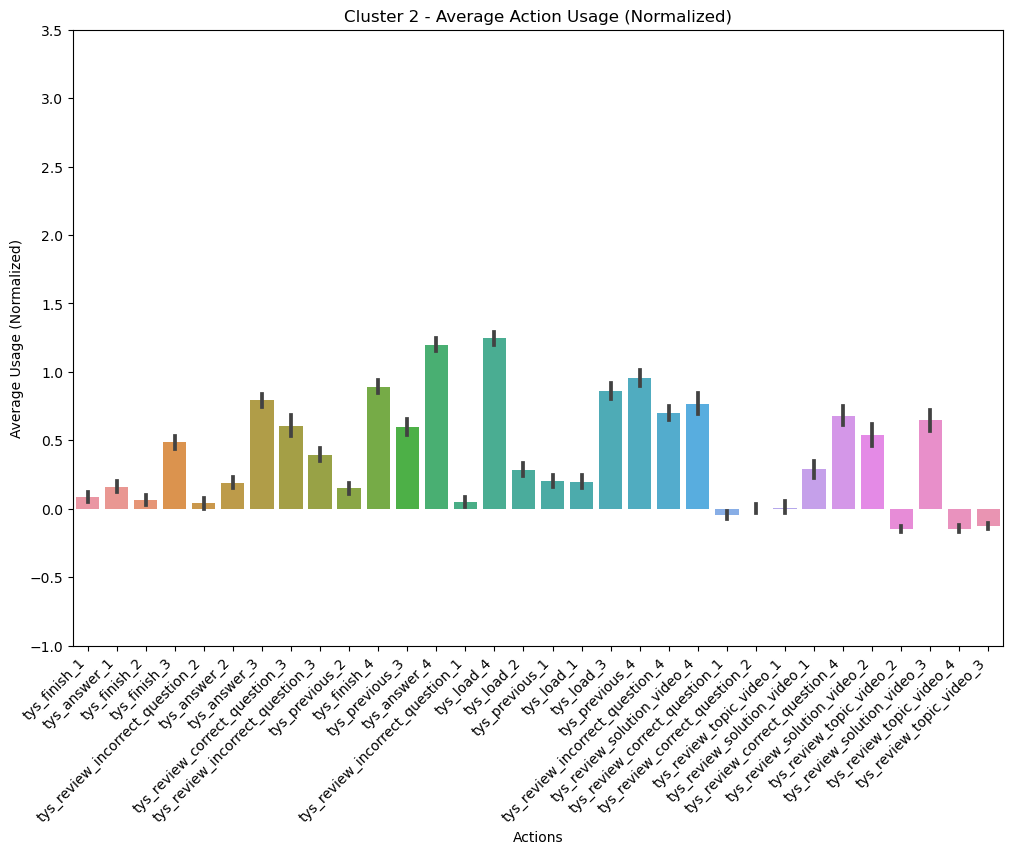

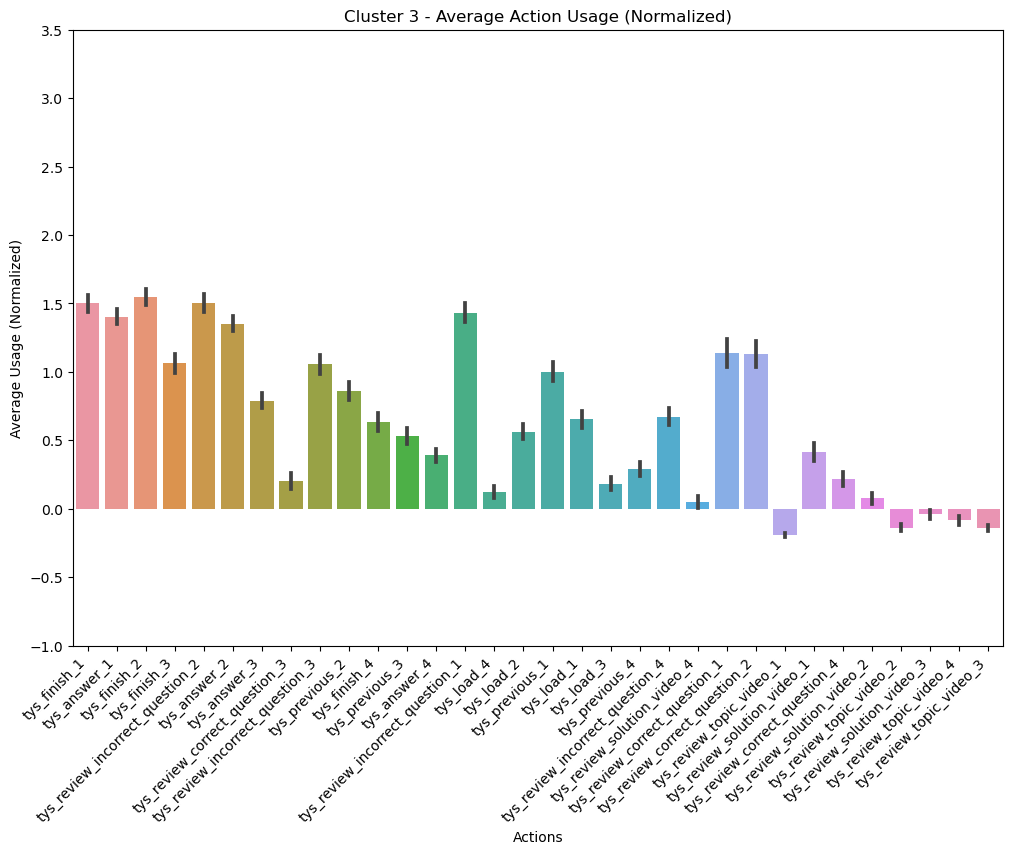

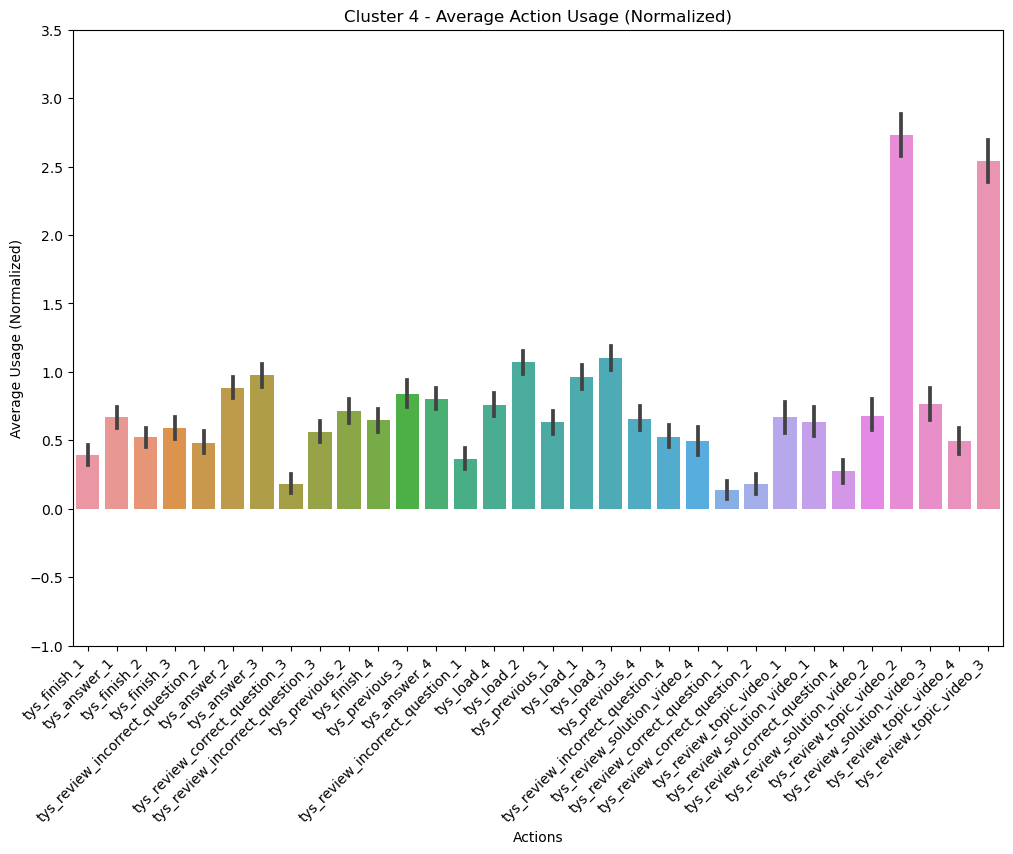

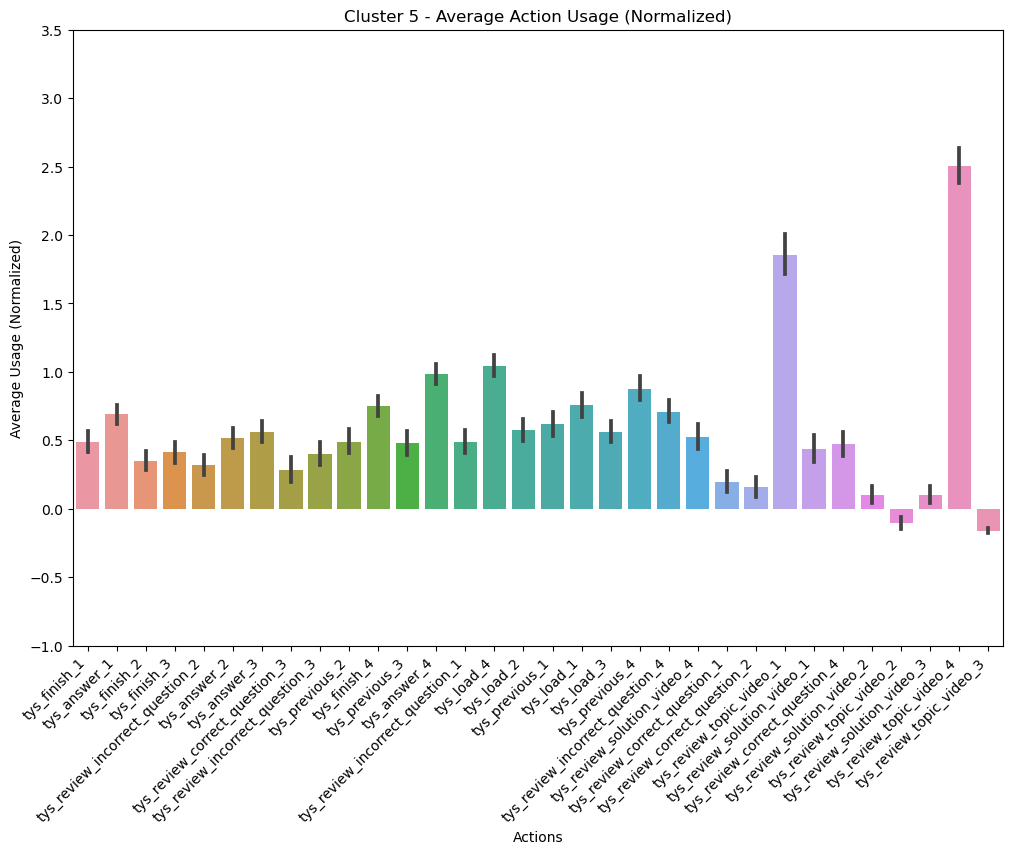

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()


# Normalize the entire dataset
normalized_data_full = scaler.fit_transform(df[cols])
df_normalized = pd.DataFrame(normalized_data_full, columns=cols)

# Determine the global min and max values for the y-axis
global_min = df_normalized[cols].min().min()
global_max = df_normalized[cols].max().max()
df_normalized['cluster'] = df['cluster']

for cluster_num in range(6):  # Assuming 6 clusters
    # Filter the normalized data for the current cluster
    cluster_data_normalized = df_normalized[df_normalized['cluster'] == cluster_num]

    # Plotting the mean values of the normalized data
    plt.figure(figsize=(12, 8))
    sns.barplot(data=cluster_data_normalized[cols])
    plt.title(f'Cluster {cluster_num} - Average Action Usage (Normalized)')
    plt.xlabel('Actions')
    plt.ylabel('Average Usage (Normalized)')
    plt.ylim(-1, 3.5)  # Set the same y-axis limits for all plots
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()